In [16]:
import wooldridge as woo
import numpy as np
import patsy as pt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.base.model as smclass

In [4]:
!pip install wooldridge

   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/5.1 MB 465.5 kB/s eta 0:00:11
   ---------------------------------------- 0.1/5.1 MB 465.5 kB/s eta 0:00:11
    --------------------------------------- 0.1/5.1 MB 327.3 kB/s eta 0:00:16
    --------------------------------------- 0.1/5.1 MB 327.7 kB/s eta 0:00:16
    --------------------------------------- 0.1/5.1 MB 363.1 kB/s eta 0:00:14
    --------------------------------------- 0.1/5.1 MB 342.4 kB/s eta 0:00:15
   - -------------------------------------- 0.1/5

In [5]:
from pathlib import Path

In [ ]:
file_path = Path(C:\Users\khali\Desktop\Jupyter\Econometrics\AE_Lab_07)

In [12]:
import os as os
os.getcwd()
os.chdir('C://Users//khali//Desktop//Jupyter//Econometrics//AE_Lab_07')
os.getcwd()

'C:\\Users\\khali\\Desktop\\Jupyter\\Econometrics\\AE_Lab_07'

In [18]:
mroz = woo.dataWoo("mroz")
y, X = pt.dmatrices("hours ~ nwifeinc + educ + exper +"
                    "I(exper**2)+ age + kidslt6 + kidsge6",
                    data=mroz, return_type="dataframe")

In [20]:
# generate starting solution:
reg_ols = smf.ols(formula="hours ~ nwifeinc + educ + exper + I(exper**2) +"
                          "age + kidslt6 + kidsge6", data=mroz)

In [22]:
results_ols = reg_ols.fit()
sigma_start = np.log(sum(results_ols.resid ** 2) / len(results_ols.resid))
params_start = np.concatenate((np.array(results_ols.params), sigma_start),
                              axis=None)

In [24]:
class Tobit(smclass.GenericLikelihoodModel):
    # define a function that returns the negative log likelihood per observation
    # for a set of parameters that is provided by the argument "params":
    def nloglikeobs(self, params):
        # objects in "self" are defined in the parent class:
        X = self.exog
        y = self.endog
        p = X.shape[1]
        # for details on the implementation see Wooldridge (2019), formula 17.22:
        beta = params[0:p]
        sigma = np.exp(params[p])
        y_hat = np.dot(X, beta)
        y_eq = (y == 0)
        y_g = (y > 0)
        ll = np.empty(len(y))
        ll[y_eq] = np.log(stats.norm.cdf(-y_hat[y_eq] / sigma))
        ll[y_g] = np.log(stats.norm.pdf((y - y_hat)[y_g] / sigma)) - np.log(sigma)
        # return an array of log likelihoods for each observation:
        return -ll

In [26]:
reg_tobit = Tobit(endog=y, exog=X)
results_tobit = reg_tobit.fit(start_params=params_start, maxiter=10000, disp=0)
print(f"results_tobit.summary(): \n{results_tobit.summary()}\n")

results_tobit.summary(): 
                                Tobit Results                                 
Dep. Variable:                  hours   Log-Likelihood:                -3819.1
Model:                          Tobit   AIC:                             7656.
Method:            Maximum Likelihood   BIC:                             7698.
Date:                Thu, 03 Apr 2025                                         
Time:                        11:54:56                                         
No. Observations:                 753                                         
Df Residuals:                     745                                         
Df Model:                           7                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       965.3056    446.438      2.162      0.031      90.303    1840.308
nwifeinc         

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\base\model.py:2748: UserWarning: df_model + k_constant + k_extra differs from k_params
  warnings.warn("df_model + k_constant + k_extra "
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\base\model.py:2752: UserWarning: df_resid differs from nobs - k_params
  warnings.warn("df_resid differs from nobs - k_params")


In [28]:
mroz

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310.0,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800.0,0.6615,7,7,11.0,1,5,19.499981,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040.0,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300.0,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300.0,0.6215,12,14,9.5,1,7,20.100058,1.524272,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0,0,0,2,40,13,NaN,0.00,3020,43,...,28200.0,0.6215,10,10,9.5,1,5,28.200001,NaN,25
749,0,0,2,3,31,12,NaN,0.00,2056,33,...,10000.0,0.7715,12,12,7.5,0,14,10.000000,NaN,196
750,0,0,0,0,43,12,NaN,0.00,2383,43,...,9952.0,0.7515,10,3,7.5,0,4,9.952000,NaN,16
751,0,0,0,0,60,12,NaN,0.00,1705,55,...,24984.0,0.6215,12,12,14.0,1,15,24.983999,NaN,225


<Axes: >

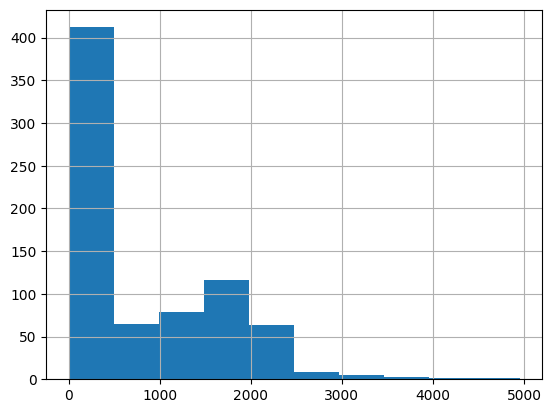

In [33]:
mroz.hours.hist()